# Dataset example: NASA FIRMS - Data Ingest and Manipulation in Python
Source: https://firms.modaps.eosdis.nasa.gov/content/academy/data_ingest/firms_data_ingest.html
More details about the data: https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data

In [2]:
# import libraries for data manipulation
import pandas as pd

# Reading VIIRS csv sample data set into a DataFrame df
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# Display how many rows (records) and columns (values per record) we have
print ('FIRMS sample fire data contains %i rows and %i columns' % (df.shape[0], df.shape[1]))
df.shape

# Display information about our data
df.info()

FIRMS sample fire data contains 74605 rows and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74605 entries, 0 to 74604
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    74605 non-null  float64
 1   longitude   74605 non-null  float64
 2   bright_ti4  74605 non-null  float64
 3   scan        74605 non-null  float64
 4   track       74605 non-null  float64
 5   acq_date    74605 non-null  object 
 6   acq_time    74605 non-null  int64  
 7   satellite   74605 non-null  object 
 8   instrument  74605 non-null  object 
 9   confidence  74605 non-null  object 
 10  version     74605 non-null  object 
 11  bright_ti5  74605 non-null  float64
 12  frp         74605 non-null  float64
 13  daynight    74605 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 8.0+ MB


In [4]:
# Display the first 5 records from our dataset
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N
3,2.15681,13.94618,319.05,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,288.77,1.81,N
4,2.15754,13.94131,301.13,0.51,0.50,2023-07-12,3,N,VIIRS,n,2.0NRT,288.17,1.81,N


In [6]:
# Display the last 5 records from our dataset
df.tail()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
74600,61.42408,-110.40578,350.48,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,309.39,16.01,D
74601,61.42510,-110.39867,336.03,0.4,0.4,2023-07-12,1950,N,VIIRS,l,2.0URT,308.08,32.98,D
74602,61.42733,-110.40780,328.53,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,298.15,16.01,D
74603,61.42834,-110.40069,338.45,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,302.81,32.98,D
74604,61.42936,-110.39356,339.52,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,306.58,32.98,D


In [8]:
# Using 'describe' to get the stats of some columns, e.g. bright_ti4','bright_ti5','frp' using .describe()
df[['bright_ti4','bright_ti5','frp']].describe() 

,bright_ti4,bright_ti5,frp
count,74605.00000,74605.000000,74605.000000
mean,334.42672,297.323856,11.357923
std,18.18826,9.801624,22.482901
min,208.00000,239.210000,0.000000
25%,328.91000,291.070000,2.900000
50%,336.20000,298.840000,5.520000
75%,345.09000,302.750000,10.520000
max,367.00000,385.310000,584.090000


The output above contains:
*  Count number of non-NA/null observations
*  Mean of the values
*  Standard deviation of the observations
*  Minimum and maximum values in the object
*  The percentiles in the output. The default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles. Those tell that 25%, 50%, or 75% of your data has values less than equal the value on the table.

In [10]:
# Want to create a smaller dataset with only columns that we wish to work with.
columnsToKeep = ['latitude', 'longitude', 'bright_ti4', 'bright_ti5', 'frp']

# This smaller dataset will be stored in subDF (subset dataframe)
subDF = df[columnsToKeep]

# Let's look at the first 5 row entries
subDF.head()

,latitude,longitude,bright_ti4,bright_ti5,frp
0,0.05836,29.59085,295.64,275.15,0.83
1,0.48765,31.50760,296.73,275.15,0.56
2,2.15227,13.94524,305.26,287.94,1.08
3,2.15681,13.94618,319.05,288.77,1.81
4,2.15754,13.94131,301.13,288.17,1.81


In [12]:
# Let's save this subset in a new csv file 
outputPath = "sample_viirs_snpp_071223_sub.csv"
subDF.to_csv(outputPath)  

In [14]:
%ls

 Volume in drive C is OS
 Volume Serial Number is AE1F-A8E1

 Directory of C:\Users\cgroc\OneDrive\Documentos\TEACHING\PHYS 605\2024\Week 1

09/09/2024  12:12 PM    <DIR>          .
09/09/2024  12:12 PM    <DIR>          ..
09/02/2024  08:19 PM    <DIR>          .ipynb_checkpoints
09/01/2024  06:28 PM          (48,140) 1520238131137.jfif
09/01/2024  06:05 PM         (280,851) 477520a.pdf
09/01/2024  05:51 PM       (8,405,819) AS2021_12_3and6_SystematicErrors_Mathias.pdf
09/04/2024  09:47 AM           111,668 Canada_wildfires_July_12_2023.png
09/01/2024  06:47 PM       (1,210,061) Chemie Ingenieur Technik - 2023 - Bunde - The Different Types of Noise and How They Effect Data Analysis.pdf
09/01/2024  03:29 PM         (570,433) firms_data_ingest.pdf
09/01/2024  03:29 PM       (1,457,581) firms_visualization.pdf
09/01/2024  01:00 PM          (33,337) MITx exercises 2.ipynb
09/01/2024  06:47 PM          (86,021) MITx exercises 3.ipynb
09/01/2024  12:25 PM           (4,875) MITx exercises.ip

C:\Users\cgroc\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


<Axes: >

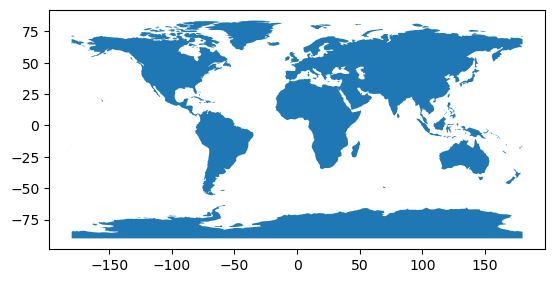

In [16]:
# Installing some libraries as they are not default on the system
#!pip install geodatasets cartopy
#pip install geopandas
# Source: https://firms.modaps.eosdis.nasa.gov/content/academy/data_visualization/firms_visualization.html

import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

# let's get our basic earth data
path = get_path("naturalearth.land")
world = geopandas.read_file(path)

# and test our libraries loaded
world.plot()

In [18]:
# Converting latitude, longitude values into point geometry; the world map dataset has different projections.
# We will use projection EPSG:4326 
# EPSG:4326 - WGS 84, latitude/longitude coordinate system based on the Earth's center of mass, used by the Global Positioning System among others.

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# show top 3 records; we will see an extra column 'geometry' that will be the new coordinate set.
gdf.head(3)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,geometry
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N,POINT (29.59085 0.05836)
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N,POINT (31.5076 0.48765)
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N,POINT (13.94524 2.15227)


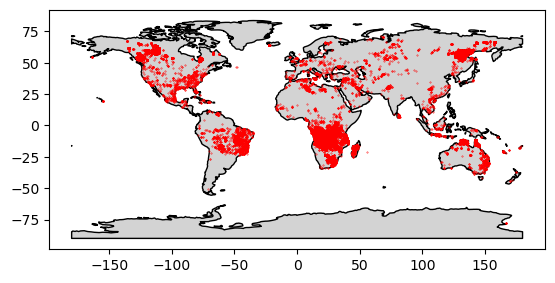

In [20]:
# optional: set outline and fill colors
ax = world.plot(color="lightgrey", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()

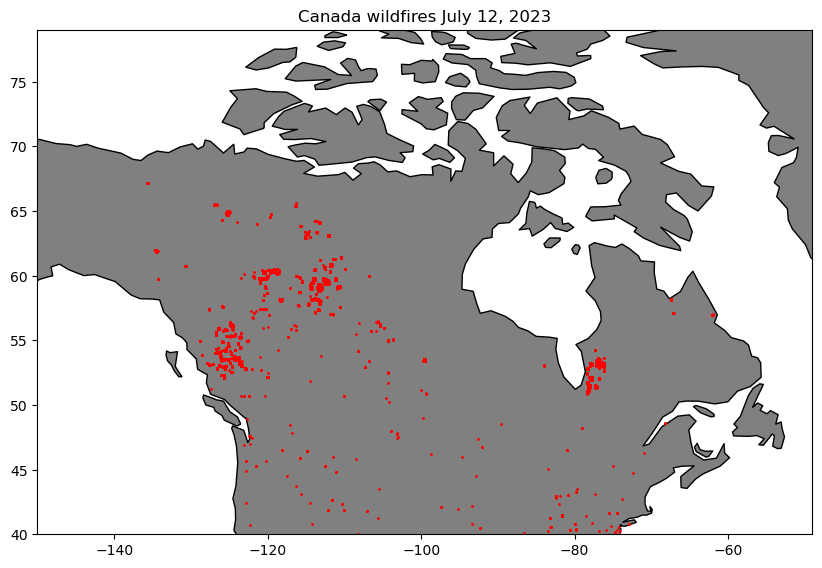

In [22]:
# Focus on Canada
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

# create geometry for points using latitude and longitude and specifying projection as EPSG:4326
gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)

# set our extent
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Canada wildfires July 12, 2023')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=1)

plt.show()

The map above simply puts a red circle at the geometry point where a detection occurred. We can break this down by adding more colors in accordance:

Assuming that current date and time is 2023 July 12, 19:50 (7:50pm) GMT time. We will color code our detections:

*  dark red; detections <= 1 hour
*  red; detections > 1 hour but less than or equal to 4 hours
*  orange; detections > 4hours and less than or equal to 12 hours
*  yellow; detections older than 12 hours

In [24]:
# convert aqc_date and aqc_time to acq_datetime as datetime object
df_canada['acq_datetime'] = pd.to_datetime(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')
gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)
# find maximum time from our dataset since we are pretending current date time is July 12 2023, 19:50(7:50pm) GMT.
# if the data were recent, we would set dt_max = pd.Timestamp.now();
dt_max = gdf['acq_datetime'].max()

# create our subsets for 4 color classes

# less than or equal to 1 hour; gdf1 <= 1hour
gdf1 = gdf[gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=1))]

# greater than 1 hour but less than or equal to 4 hours; gdf2 > 1 hour and gdf2 <= 4 hours
gdf2 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=4))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=1)))]

# greater than 4 hours but less than or equal to 12 hours; gdf3 > 4 hours and gdf2 <= 12 hours
gdf3 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=12))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=4)))]

# greater than 12 hours; gdf4 > 12 hours
gdf4 = gdf[gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=12))]

# Making sure the sizes are correct. They should all add up to 14045
print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))

Sizes 3792, 913, 8449, 891 from total of 14045


C:\Users\cgroc\AppData\Local\Temp\ipykernel_17496\3778205462.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))
C:\Users\cgroc\AppData\Local\Temp\ipykernel_17496\3778205462.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))
C:\Users\cgroc\AppData\Local\Temp\ipykernel_17496\3778205462.py:25: FutureWarning: Series.__getitem__ treating keys as positions is 

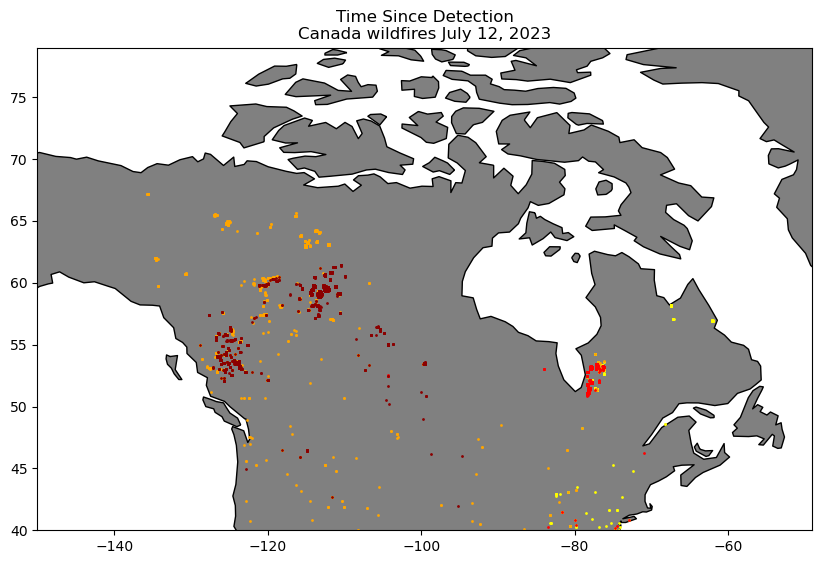

In [26]:
# set our extent to Canada
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")

# set map extent
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

# add graph title
ax.set(title='Time Since Detection\nCanada wildfires July 12, 2023')

# Color code each set; also we are drawing in opposite order, so the older detections are drawn first so the newer ones are on the top
gdf4.plot(ax=ax, color="yellow", markersize=1)
gdf3.plot(ax=ax, color="orange", markersize=1)
gdf2.plot(ax=ax, color="red", markersize=1)
gdf1.plot(ax=ax, color="darkred", markersize=1)

plt.savefig("Canada_wildfires_July_12_2023.png")
plt.show()